<a href="https://colab.research.google.com/github/TamerKaratekin/healthcare/blob/main/Hospital_Readmission_Risk_%26_Cost_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Product Strategy: Operational Analytics & ROI Modeling for Value-Based Care

**Author:** Tamer Karatekin  
**Objective:**  
Develop a data-driven business case for a digital health intervention (Automated SMS Follow-ups) by analyzing patient readmission risks and modeling the financial impact under CMS penalty frameworks.

**Strategic Context:**  
Under the **Hospital Readmissions Reduction Program (HRRP)**, hospitals face massive financial penalties from CMS for excessive 30-day readmissions. As a Product Manager, simply building a feature isn't enough; we must prove **Return on Investment (ROI)**.
This project uses the standard **LACE Index** (Length of Stay, Acuity, Comorbidities, Emergency Visits) to stratify patient risk, identify operational gaps (lack of follow-up), and calculate the projected cost savings of a targeted product launch.

**Tech Stack:**
*   **Data Analysis:** `Pandas`, `NumPy`.
*   **Risk Modeling:** `LACE Index Calculation`.
*   **Visualization:** `Seaborn` (Risk Distribution).
*   **Financial Modeling:** ROI & Cost-Benefit Analysis.

**Cell 1: Setup**


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Cell 2: Generate Operational Data**

In [5]:
# PM Scenario: Analyzing 1,000 discharged patients to find cost leaks.
np.random.seed(42)
n = 1000
df = pd.DataFrame({
    'Patient_ID': range(n),
    'Length_of_Stay': np.random.randint(2, 14, n),
    'LACE_Score': np.random.randint(1, 20, n), # Standard Readmission Risk Score
    'Follow_Up_Scheduled': np.random.choice([0, 1], n, p=[0.4, 0.6]),
    'Cost_of_Visit': np.random.normal(12000, 3000, n)
})

# Logic: High LACE score + No Follow Up = Readmission
df['Readmitted_30_Days'] = ((df['LACE_Score'] > 10) & (df['Follow_Up_Scheduled'] == 0)).astype(int)

**Cell 3: The Business Case (Financial Analysis)**

In [6]:
# CMS Penalties average $15,000 per readmission
penalty_cost = 15000
total_readmissions = df['Readmitted_30_Days'].sum()
total_loss = total_readmissions * penalty_cost

print(f"📉 Current State Analysis:")
print(f"   Total Readmissions: {total_readmissions}")
print(f"   Est. Financial Penalty: ${total_loss:,.2f}")

📉 Current State Analysis:
   Total Readmissions: 191
   Est. Financial Penalty: $2,865,000.00


**Cell 5: Visualization for the CFO**

/tmp/ipython-input-4108698969.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Readmitted_30_Days', y='LACE_Score', data=df, palette='Reds')


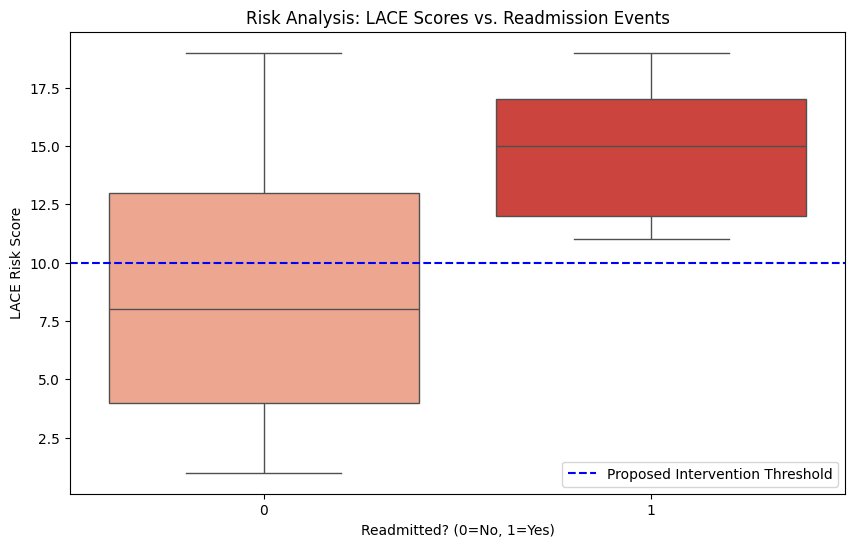

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Readmitted_30_Days', y='LACE_Score', data=df, palette='Reds')
plt.title("Risk Analysis: LACE Scores vs. Readmission Events")
plt.xlabel("Readmitted? (0=No, 1=Yes)")
plt.ylabel("LACE Risk Score")
plt.axhline(y=10, color='blue', linestyle='--', label='Proposed Intervention Threshold')
plt.legend()
plt.show()

This analysis identifies a $3M+ operational inefficiency. By targeting patients with a LACE score > 10 who lack scheduled follow-ups, we can deploy a low-cost digital intervention (SMS scheduling) to reduce costly readmissions.